# HWK1- Javiera Toro Grey, 20.906.812-5

We are going to characterize data from TOI 216, a star with 0.84 Solar masses and a Tempetature of 5026K, so this is a spectral K-type star.

There are two confirmed exoplanets orbiting the star, TOI-216b and TOI-216c, 8 and 10 earth masses respectively.

Now let's work on the light curve for TOI-216b.

In [4]:
# Dependencies
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

First, let's check the available data from the star in the TESS repository, using the library lightkurve, and in the TESScut webpage

In [5]:
search_result = lk.search_targetpixelfile('TOI216b', mission='TESS')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,55652896,0.0
1,TESS Sector 02,2018,SPOC,120,55652896,0.0
2,TESS Sector 03,2018,SPOC,120,55652896,0.0
3,TESS Sector 04,2018,SPOC,120,55652896,0.0
4,TESS Sector 05,2018,SPOC,120,55652896,0.0
5,TESS Sector 06,2018,SPOC,120,55652896,0.0
6,TESS Sector 12,2019,SPOC,120,55652896,0.0
7,TESS Sector 07,2019,SPOC,120,55652896,0.0
8,TESS Sector 08,2019,SPOC,120,55652896,0.0


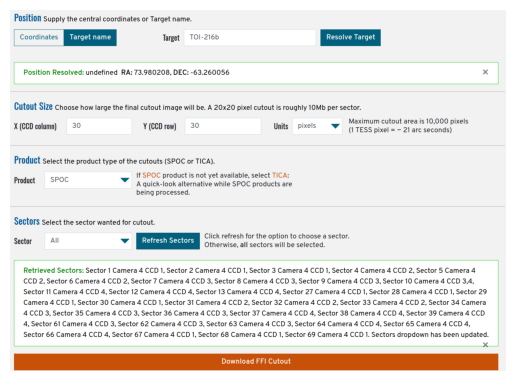

In [6]:
# DO NOR RUN THIS SECTION, JUST TO VISUALIZE WEEB PAGE
import matplotlib.image as mpimg

image_path = 'Images/WEB_IMAGE.png'
image = mpimg.imread(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


As the sector is not relevant to the derivation of the light curve, the sector would be decided randomly.

In [7]:
np.random.seed(28)
sector = np.random.randint(1, 69)
print(f'The decided sector would be {sector}')

The decided sector would be 2


Now the FFI data for TOI-216b the sector 30 is downloaded and visualized in a 50x50 stamp

In [8]:
target = 'TOI216b'
tpf = lk.search_tesscut(target, sector=sector).download(cutout_size=(20, 20))
tpf.animate()

# Star Masking

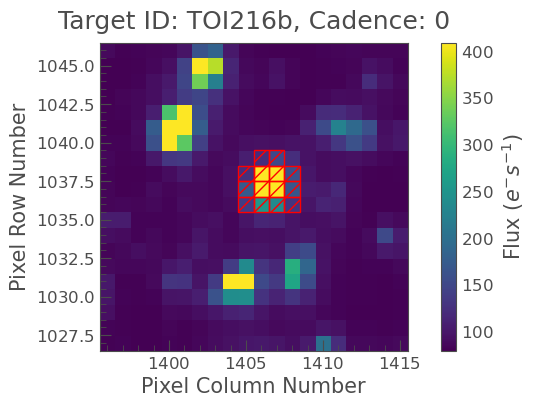

In [9]:
# Star masking
# The thresh is the value for the pixel to be included in the mask,
# the pixel needs to be thresh times sigma brighter than the median flux

thresh = 3
aper = tpf.create_threshold_mask(thresh)
tpf.plot(aperture_mask=aper);

The threshold of 3 was chosen because values below this threshold do not capture parts of the star's flux, while higher values tend to include background light and nearby objects. Here are some examples to illustrate this decision

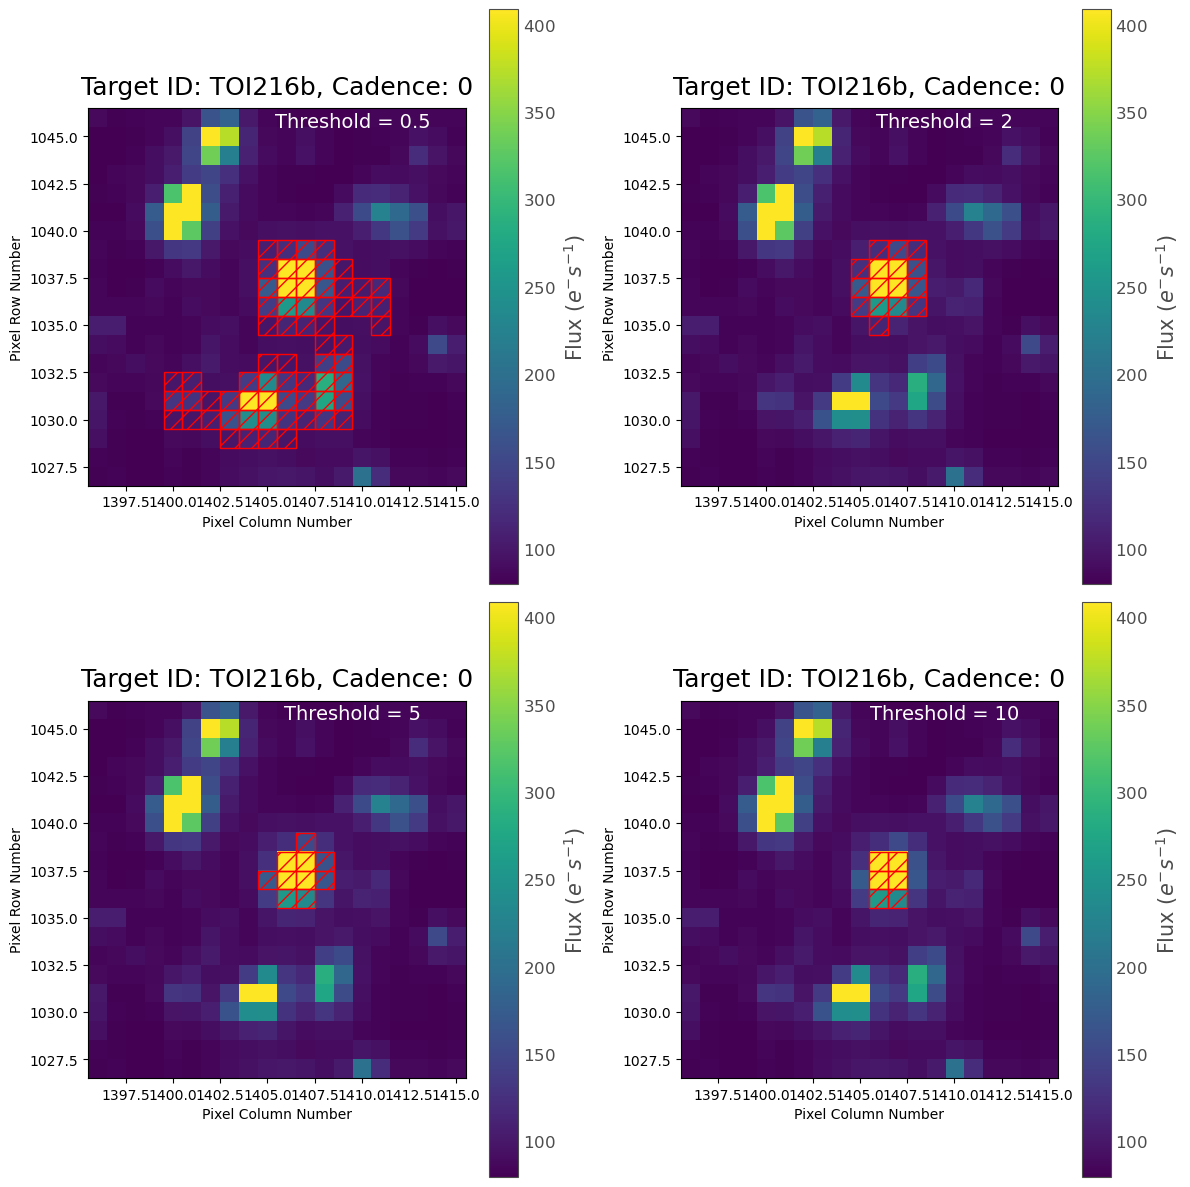

In [10]:
fig, axis_list = plt.subplots(2, 2, figsize=(12, 12))
thresh_list = [0.5, 2, 5, 10]

for i in range(4):
    thresh = thresh_list[i]
    ax = axis_list[i // 2, i % 2]
    aper_plot = tpf.create_threshold_mask(thresh)
    tpf.plot(aperture_mask=aper_plot, ax=ax)
    ax.text(0.7,0.95, f'Threshold = {thresh}',
            horizontalalignment='center', transform=ax.transAxes,
            color='w', size=14)
    
plt.tight_layout()
plt.show()


# Uncorrected aperture lightcurve

Now, the uncorrected aperture light curve for threshold 3 is plotted below, followed by the  aperture light curves for the example thresholds used before, below that.

Text(0.5, 1.0, 'Aperture Light Curve')

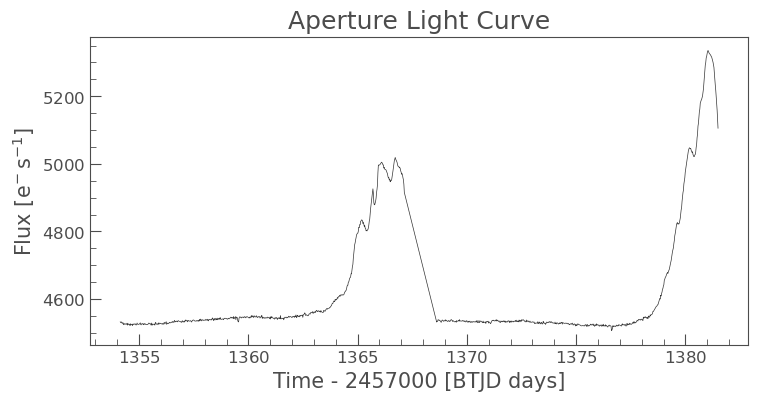

In [11]:
# The uncorrected aperture light curve for threshold 3
uncorrected_lc = tpf.to_lightcurve(aperture_mask=aper)
uncorrected_lc.plot();
plt.title('Aperture Light Curve', fontsize=18)

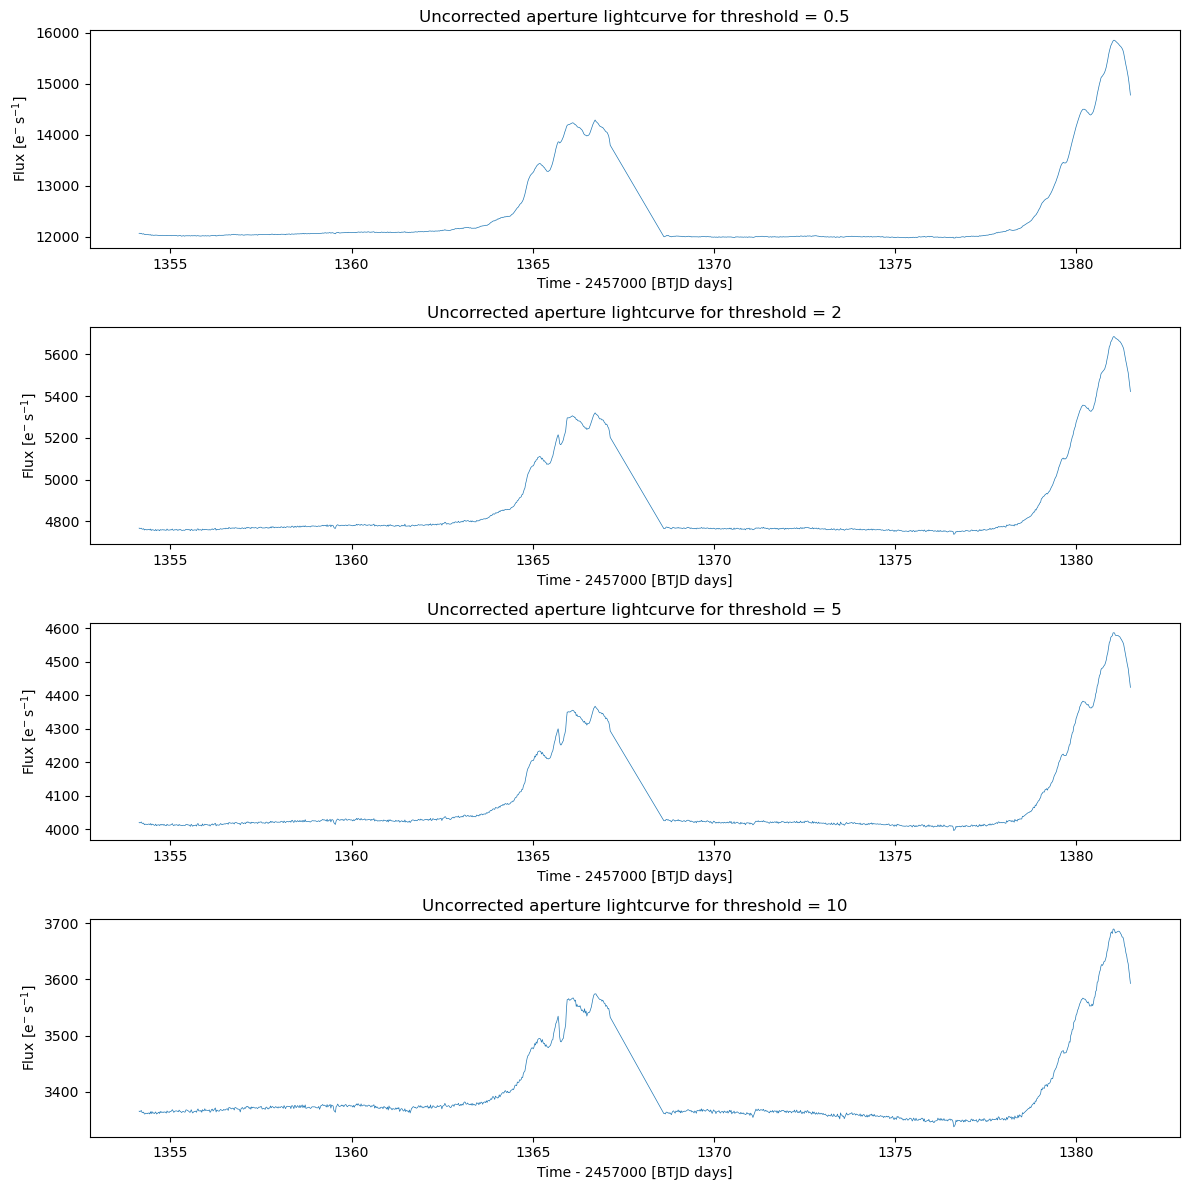

In [12]:
# The uncorrected lightcurves for example thresholds
fig, axis_list = plt.subplots(4, 1, figsize=(12, 12))
thresh_list = [0.5, 2, 5, 10]

for i in range(4):
    thresh = thresh_list[i]
    ax = axis_list[i]
    ax.set_title(f'Uncorrected aperture lightcurve for threshold = {thresh}')
    aper_plot = tpf.create_threshold_mask(thresh)
    uncorrected_lc_plot = tpf.to_lightcurve(aperture_mask=aper_plot)
    uncorrected_lc_plot.plot(ax=ax)
    
plt.tight_layout()
plt.show()


When considering how the chosen aperture affects the aperture light curve, we find that for thresholds below 3, the baseline is less variable than the selected one. This could obscure or even make undetectable the planet transit. On the other hand, for thresholds above 3, although the baseline may capture the planet transit, it fails to account for the entire star's flux, leading to the planet parameters estimates that do not accurately represent the actual eclipse occurring in the star, this is seen in the lower flux axis. 

# Scaterred light
One method to assess scattered light in aperture light curves involves comparing them to background light curves. Any systematic differences observed between the target and background light curves may indicate scattered light contamination.

Text(0.5, 1.0, 'Background Aperture Light Curve')

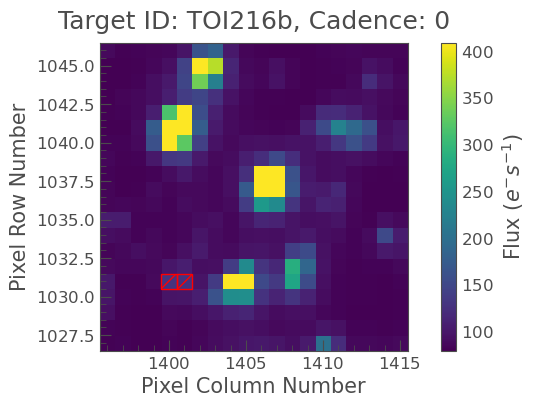

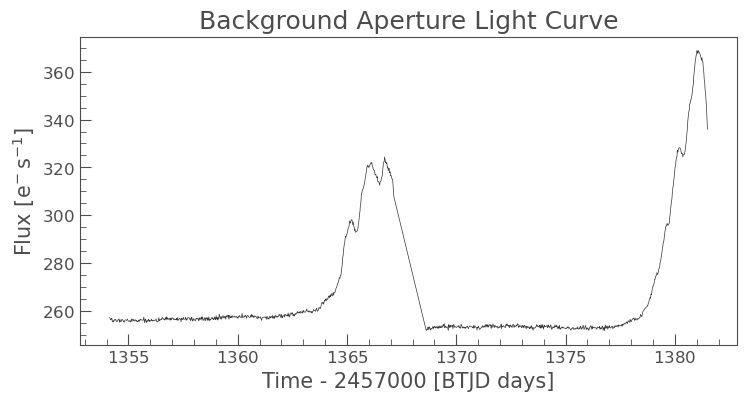

In [13]:
# Background lightcurve
thresh = 3
bkg_aper = tpf.create_threshold_mask(thresh, (0,0))
tpf.plot(aperture_mask=bkg_aper)

uncorrected_lc_bkg = tpf.to_lightcurve(aperture_mask=bkg_aper)
uncorrected_lc_bkg.plot();
plt.title('Background Aperture Light Curve', fontsize=18)


Text(0.5, 1.0, 'Aperture Light Curve')

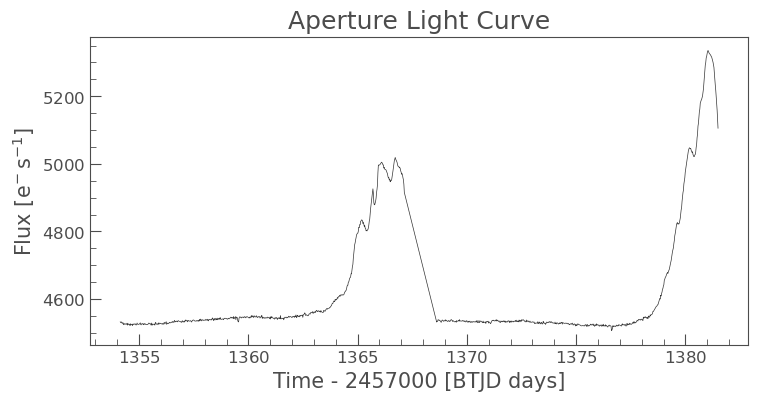

In [14]:
# Star lightcurve again
uncorrected_lc.plot();
plt.title('Aperture Light Curve', fontsize=18)

Comparing both light curves, the baseline in the star's light curve appears curved, indicating the presence of scattering light. Additionally, the elevated baseline in both curves, represented by the peaks, corresponds to the scattering light from both the Earth and the Moon.

This is caused by the moon's phases.

Finally, the lightcurve fot TOI-216b is affected by scattering light, showing a neccesity for a correction to be able to study the planet transit.

# Lightcurve correction

Firstly, let's use a linear regression algorithm to asses the scattering light in the lightcurve. For this, the regression corrector with a design matrix can do this.

As a first step, the regressors, independent variables, are defined as an array with shape ntime x npixels outside of the aperture. Then, the Design Matrix or the regressor matrix is costructed as a two-dimensional array that holds multiple columns, each representing a single regressor.

In [15]:
regressors = tpf.flux[:, ~aper]
dm = lk.DesignMatrix(regressors, name='regressors')
dm

regressors DesignMatrix (1196, 386)

Now, the design matrix is too large for the computer to detrend the lightcurve, so by using Principal Component Analysis, the size of the matrix is reduced.

Doing this can remove some of the stochastic noise in the detrending vectors and avoid pixels that have intrinsic variability that can be confused with the signal of our target.

In [16]:
# Reduce dm to 10 detrend vectors
dm = dm.pca(10)
reduced_dm = dm.append_constant()

Now with the design matrix defined, the RegressionCorrector class from lightkurve, aplly linear regresion to detrend the uncorrected lightcurve.

Then according to the model, there can be a necessity to subtract the model flux value at the 10th percentil if the model is below 0.

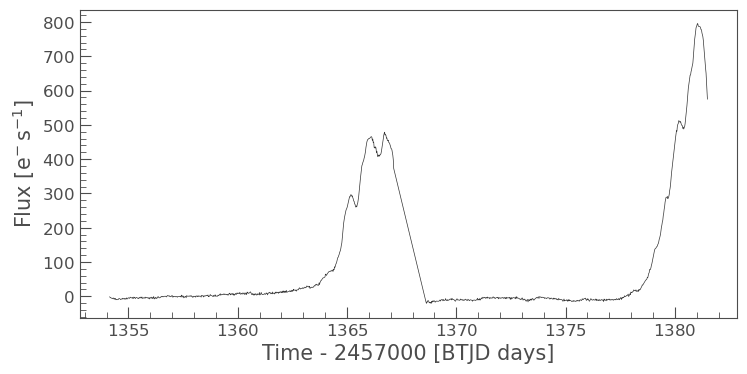

In [17]:
rc = lk.RegressionCorrector(uncorrected_lc)
corrected_ffi_lc = rc.correct(reduced_dm)

# Let's see the model
model = rc.model_lc
model.plot();

As the model has some parts below 0, then the corrected lightcurve would be the substraction between the lightcurve and the model plus the 10th percentile

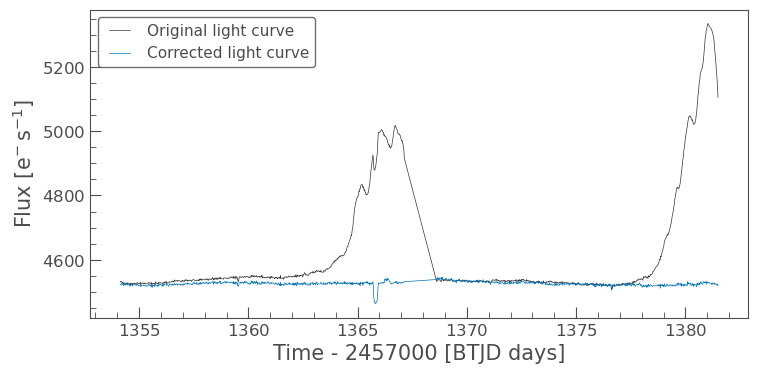

In [18]:
corrected_ffi_lc = uncorrected_lc - rc.model_lc + np.percentile(rc.model_lc.flux, 10)

ax = uncorrected_lc.plot(label='Original light curve')
corrected_ffi_lc.plot(ax=ax, label='Corrected light curve');

With this, the TOI-216b transit is clear around 1366 BTJD, but it is important to know that the  aperture's decision, the number of detrended vectors reduced and percentile substracted to the model are the main sources of error 

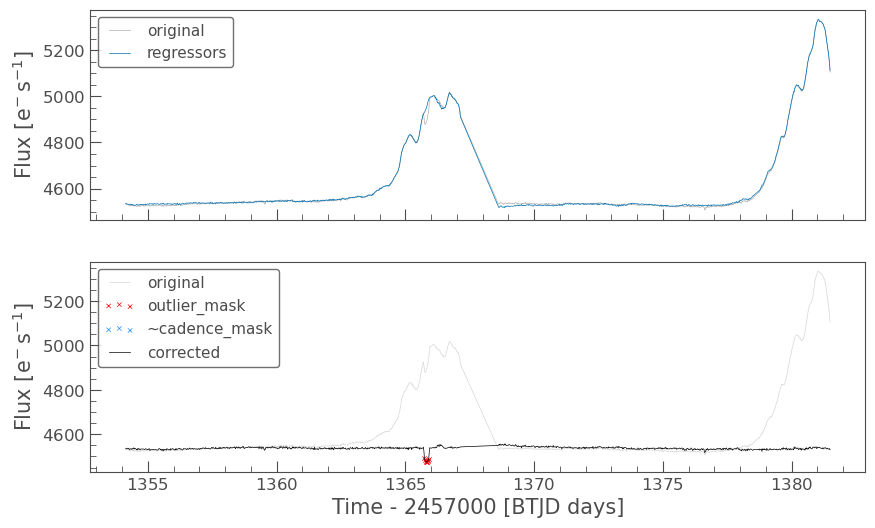

In [20]:
rc.diagnose();
#  The outlier would be the planet transit

# Second Corrected Lightcurve

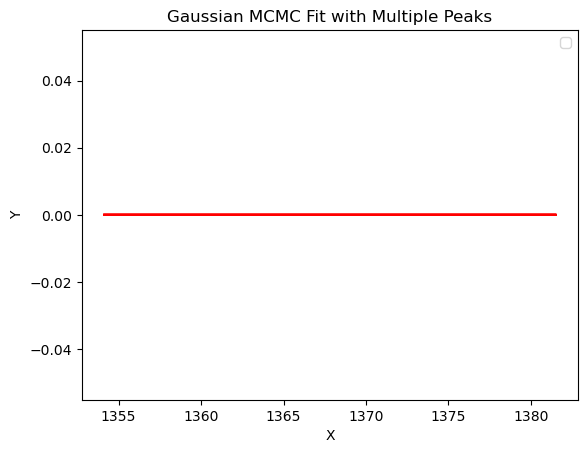

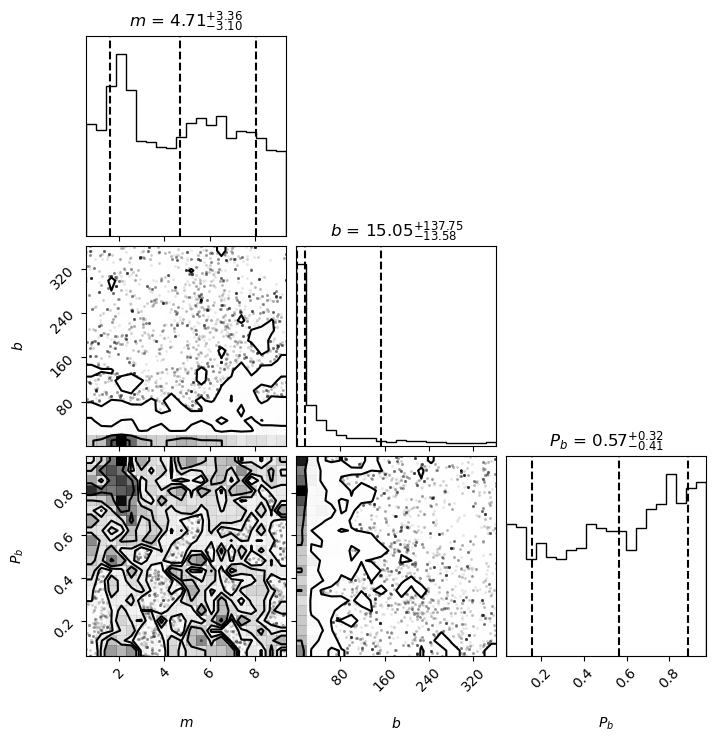

In [111]:
import numpy as np
import emcee

# Generate synthetic data for demonstration purposes
np.random.seed(42)
x = tpf.time.value
y_obs = np.sum(tpf.flux[:,aper], axis=1).value  # Add Gaussian noise to the true values


def model(params, x):
    a, mu1, sigma1, b, mu2, sigma2 = params
    return a*np.exp(-(x-mu1)**2/(2*sigma1**2)) + b*np.exp(-(x-mu2)**2/(2*sigma2**2))


def log_likelihood(params, x, y_obs):
    # Calculate the model values for each peak
    models = model(params, x)

    # Compute the residuals
    residuals = y_obs - models
    # Calculate the log likelihood
    return -0.5 * np.sum(residuals ** 2)


def log_prior(params):
    a, mu1, sigma1, b, mu2, sigma2 = params
    if 0 < a < 10 and 0 < mu1 < 500 and 0 < sigma1 < 1 and 0 < b < 10 and 0 < mu2 < 500 and 0 < sigma2 < 1:
        return 0
    return -np.inf


def log_probability(params, x, y_obs):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x, y_obs)


# Initialize the MCMC sampler
ndim = 6  # Number of parameters (mean, sigma, amplitude for each peak)
nwalkers = 32  # Number of walkers
initial_params = np.random.normal(loc=[2, 0.5, 1, 7, 1.0, 1], scale=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1], size=(nwalkers, ndim))  # Initial parameter guesses
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y_obs))

# Run the MCMC sampler
nsteps = 1000  # Number of MCMC steps
sampler.run_mcmc(initial_params, nsteps)

# Extract samples from the posterior distribution
samples = sampler.chain[:, :, :].reshape((-1, ndim))


# Plot the original data and the best-fitting model
# plt.plot(x, y_obs, label='Observed Data')
for params in samples[np.random.randint(len(samples), size=100)]:
    a, mu1, sigma1, b, mu2, sigma2 = params
    model = (
        a*np.exp(-(x-mu1)**2/(2*sigma1**2)) + 
        b*np.exp(-(x-mu2)**2/(2*sigma2**2))
    )
    plt.plot(x, model, color='r', alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian MCMC Fit with Multiple Peaks')
plt.legend()
plt.show()

import corner

fig = corner.corner(sampler.flatchain[:,[0, 1, 2]], 
                    labels=["$m$", "$b$", "$P_b$"], 
                    range=(0.9, 0.9, 0.9),
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, title_kwargs={"fontsize": 12})
